<a href="https://colab.research.google.com/github/jagtapuday/Flight_Delay_Prediction/blob/master/nyc_Airline_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# Hypothesis
* Is month impacting on delayed flight?
* Is day impacting on delayed flight?
* Is data scweed(dep_delay->Dependent variable)?
* Is particular carrier impact on delayed flight?
* Is particular origin impact on delayed flight?
* Is particular destination impact on delayed flight?
* Is distance impact on flighted delay?
--- 
* Is temprature of that day impacet on delayed flight?
* Is dewp impact on delayed flight?
* Is humid impact on delayed flight?
* Is pressure impact on delayed flight?
* Is visual impact on delayed flight?
--- 
* Is manufacturing year impact on delayed flight?
* Is particular type of engine impact on delayed flight?
* Is particular manyfacturer impact on delayed flight?
* Is particular model impact on delayed flight?
* Is number of engine impact in delayed flight?
* Is number of seats impact on delayed flight?
* Is particular type of engine impact on delayed flight?
---

# EDA nyc_Flights

In [ ]:
df_flights=pd.read_csv("/content/drive/My Drive/ML/Datasets/Nyc_Airline/nyc_flights.csv")

In [ ]:
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


## Analysis of flight delay w.r.t nyc_flights(file) features 

### dep_dely
Airline Delay Prediction is classification problem so we convert this continus variable into categorical variable.
    
    If 
    dep_dely >15 = 1
    else 0


In [ ]:
df_flights.dep_delay=np.where(df_flights.dep_delay>15.0,1,0)

In [ ]:
cat_col=[]
con_col=[]
for col in df_flights.columns[3:-3]:
  if len(df_flights[col].unique())<32:
    cat_col.append(col)
  else:
    con_col.append(col)
print("Categorical Variables : ",cat_col)
print("Continus Variables : ",con_col)

Categorical Variables :  ['dep_delay', 'carrier', 'origin']
Continus Variables :  ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum', 'dest', 'air_time', 'distance']


In [ ]:
plt.style.use('seaborn-whitegrid')

### Year

In [ ]:
df_flights.year.unique()

array([2013])

This dataset is of 2013 only. So In this problem statement year is not useful for us.

### Is month impacting on delayed flight?

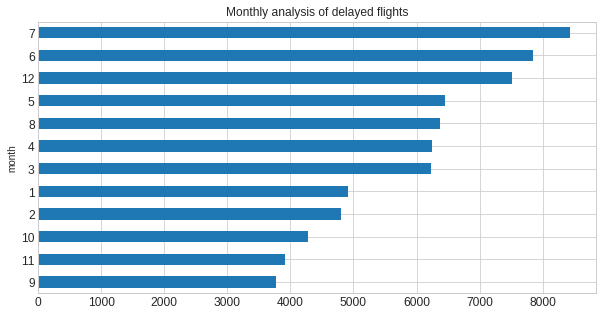

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.title("Monthly analysis of delayed flights") #t(kind="barh",ax=axes[i],title=c,fontsize=12)
df_flights.groupby("month")["dep_delay"].sum().sort_values(ascending=True).plot(kind="barh",fontsize=12,figsize=(10,5))

**The flights is mostly delayed in June, July, and December as compared to other months. So we should take a while booking flights in these months.**

### Is day impacting on delayed flight?

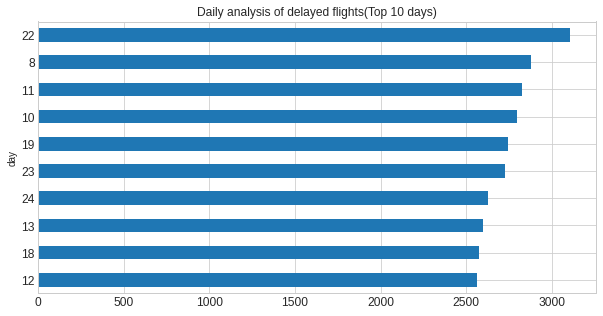

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.title("Daily analysis of delayed flights(Top 10 days)") #t(kind="barh",ax=axes[i],title=c,fontsize=12)
df_flights.groupby("day")["dep_delay"].sum().sort_values(ascending=True)[-10:].plot(kind="barh",fontsize=12,figsize=(10,5))

**As we see in the above diagram flights are delayed on 22th mostly.**



### Is data scweed(dep_delay->Dependent variable)?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


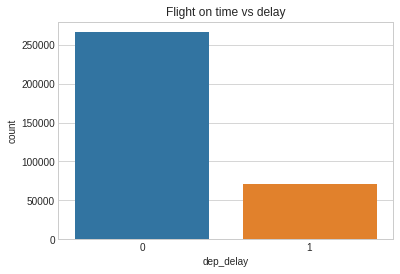

In [ ]:
plt.title("Flight on time vs delay")
sns.countplot(df_flights.dep_delay)

**Most of the flights are on time but approx. 21% of flights are delayed in this case and 79% on time. So, dataset is not balance.**

### Is particular carrier impact on delayed flight?

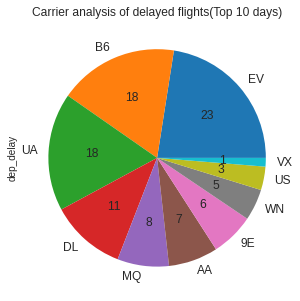

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.title("Carrier analysis of delayed flights(Top 10 days)") #t(kind="barh",ax=axes[i],title=c,fontsize=12)
df_flights.groupby("carrier")["dep_delay"].sum().sort_values(
    ascending=False)[:10].plot(kind="pie",autopct='%.0f',fontsize=12,figsize=(10,5))

**Carrier like EV(23%),B6(18%) and UA(18%) are mostly delayed**

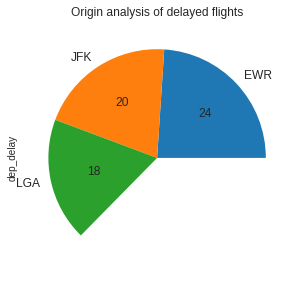

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.title("Origin analysis of delayed flights") #t(kind="barh",ax=axes[i],title=c,fontsize=12)
df_flights.groupby("origin")["dep_delay"].mean().plot(kind="pie",autopct='%.0f',fontsize=12,figsize=(10,5))

**The chances of delayed flight is more if origin is EWR as compared to JFK and LGA.**

### Is particular destination impact on delayed flight?

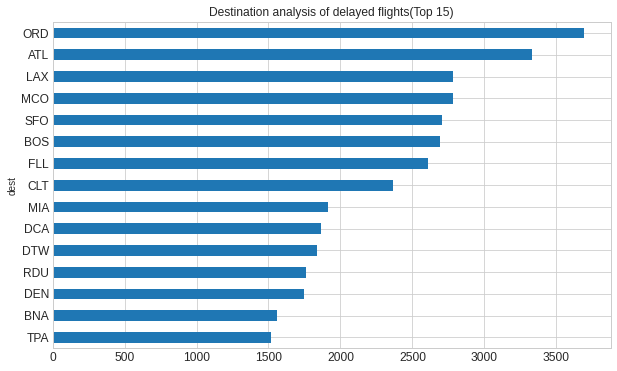

In [ ]:
plt.title("Destination analysis of delayed flights(Top 15)")
df_flights.groupby("dest")["dep_delay"].sum().sort_values(
    ascending=True)[-15:].plot(kind="barh",fontsize=12,figsize=(10,6))

**The flights whose destination is ORD or ATL are mostly delayed.**

### Is distance impact on flighted delay?

In [ ]:
df_flights["dist_bins"]=pd.cut(df_flights.distance, 10,right=True)

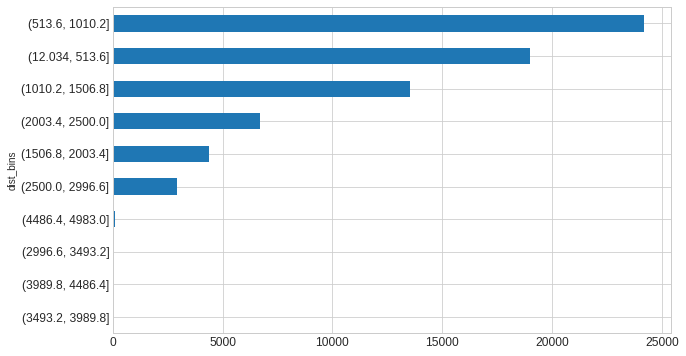

In [ ]:
df_flights.groupby('dist_bins')["dep_delay"].sum().sort_values(
    ascending=True).plot(kind="barh",fontsize=12,figsize=(10,6))

**If travelling distance less than ~ 1000 then the most of flight delayed.**

## Analyis flight_delay w.r.t. weather 
---
* Is temprature of that day impacet on delayed flight?
* Is dewp impact on delayed flight?
* Is humid impact on delayed flight?
* Is pressure impact on delayed flight?
* Is visual impact on delayed flight?

In [ ]:
df_flights=pd.read_csv("/content/drive/My Drive/ML/Datasets/Nyc_Airline/nyc_flights.csv",
                       usecols=['year','month', 'day', 'dep_delay','carrier', 'flight','tailnum',
                                'origin', 'dest', 'air_time', 'distance'])
df_weather=pd.read_csv("/content/drive/My Drive/ML/Datasets/Nyc_Airline/nyc_weather.csv")

In [ ]:
df_weather_updated=df_weather.groupby(by=['origin','year', 'month', 'day'])[['temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed',  'precip', 'pressure', 'visib']].mean()
df_flight_weather=pd.merge(df_flights,df_weather_updated,
                           left_on=['origin','year','month','day'],
                           right_index=True,how="left")
df_flight_weather.dep_delay=np.where(df_flight_weather.dep_delay>15.0,1,0)
df_flight_weather.head()

,year,month,day,dep_delay,carrier,flight,tailnum,origin,dest,air_time,distance,temp,dewp,humid,wind_dir,wind_speed,precip,pressure,visib
0,2013,1,1,0,UA,1545,N14228,EWR,IAH,227.0,1400,36.819091,22.672727,56.748182,281.818182,13.233970,0.0,1013.085714,10.000000
1,2013,1,1,0,UA,1714,N24211,LGA,IAH,227.0,1416,37.227826,21.959130,53.883478,290.000000,15.410445,0.0,1012.622727,9.956522
2,2013,1,1,0,AA,1141,N619AA,JFK,MIA,160.0,1089,36.941818,21.756364,54.291818,291.818182,15.430914,0.0,1013.219048,10.000000
3,2013,1,1,0,B6,725,N804JB,JFK,BQN,183.0,1576,36.941818,21.756364,54.291818,291.818182,15.430914,0.0,1013.219048,10.000000
4,2013,1,1,0,DL,461,N668DN,LGA,ATL,116.0,762,37.227826,21.959130,53.883478,290.000000,15.410445,0.0,1012.622727,9.956522


In [ ]:
df_flight_weather.dep_delay.value_counts()

0    266002
1     70774
Name: dep_delay, dtype: int64

### Check Null values

In [ ]:
df_flight_weather.isnull().sum()

year             0
month            0
day              0
dep_delay        0
carrier          0
flight           0
tailnum       2512
origin           0
dest             0
air_time      9430
distance         0
temp           776
dewp           776
humid          776
wind_dir       776
wind_speed     776
precip         776
pressure       776
visib          776
dtype: int64

We can Replace NAN with mean(9.29) in case of Visib.

In [ ]:
df_flight_weather.loc[df_flight_weather.temp.isna()]

,year,month,day,dep_delay,carrier,flight,tailnum,origin,dest,air_time,distance,temp,dewp,humid,wind_dir,wind_speed,precip,pressure,visib
110520,2013,12,31,0,B6,839,N566JB,JFK,BQN,189.0,1576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110521,2013,12,31,1,DL,412,N713TW,JFK,SJU,192.0,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110522,2013,12,31,1,B6,108,N374JB,JFK,PWM,50.0,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110523,2013,12,31,0,US,1895,N557UW,EWR,CLT,95.0,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110524,2013,12,31,0,UA,700,N470UA,EWR,IAH,223.0,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,2013,12,31,0,UA,1729,NaN,EWR,DEN,NaN,1605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111292,2013,12,31,0,US,1831,NaN,JFK,CLT,NaN,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111293,2013,12,31,0,MQ,3301,N844MQ,LGA,RDU,NaN,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111294,2013,12,31,0,UA,219,NaN,EWR,ORD,NaN,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_flight_weather.loc[(df_flight_weather.month==12)]["temp"].mean()

38.572757530953744

In [ ]:
weather_col=['temp' ,          
'dewp' ,          
'humid'  ,        
'wind_dir'   ,    
'wind_speed',     
'precip'    ,     
'pressure'  ,     
'visib']
for i in weather_col:
  df_flight_weather[i].fillna(df_flight_weather.loc[(df_flight_weather.month==12) & (df_flight_weather.day>=10)][i].mean(),inplace=True)

In [ ]:
df_flight_weather.dropna(inplace=True)

In [ ]:
df_flight_weather.describe()

,year,month,day,dep_delay,flight,air_time,distance,temp,dewp,humid,wind_dir,wind_speed,precip,pressure,visib
count,327346.0,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,2013.0,6.564803,15.740825,0.214721,1943.104501,150.686460,1048.371314,55.548988,41.664401,62.410662,199.033888,10.418723,0.004354,1017.619163,9.289051
std,0.0,3.413444,8.777376,0.410629,1621.523684,93.688305,735.908523,17.038859,18.791432,14.996306,76.379885,4.163299,0.012987,6.980742,1.421807
min,2013.0,1.000000,1.000000,0.000000,1.000000,20.000000,80.000000,15.455000,-6.565000,26.976250,23.750000,2.637204,0.000000,998.700000,1.332917
25%,2013.0,4.000000,8.000000,0.000000,544.000000,82.000000,509.000000,40.550000,26.600000,50.538696,140.416667,7.655189,0.000000,1012.587500,9.333333
50%,2013.0,7.000000,16.000000,0.000000,1467.000000,129.000000,888.000000,56.330000,42.545000,61.283750,209.583333,9.781630,0.000000,1017.478261,10.000000
75%,2013.0,10.000000,23.000000,0.000000,3412.000000,192.000000,1389.000000,71.045000,57.432500,73.772500,262.500000,12.514732,0.001250,1022.483333,10.000000
max,2013.0,12.000000,31.000000,1.000000,8500.000000,695.000000,4983.000000,92.142500,75.890000,97.323333,351.666667,56.388220,0.154583,1037.933333,10.000000


#### Checking Desity

In [ ]:
plt.style.use('seaborn-whitegrid')

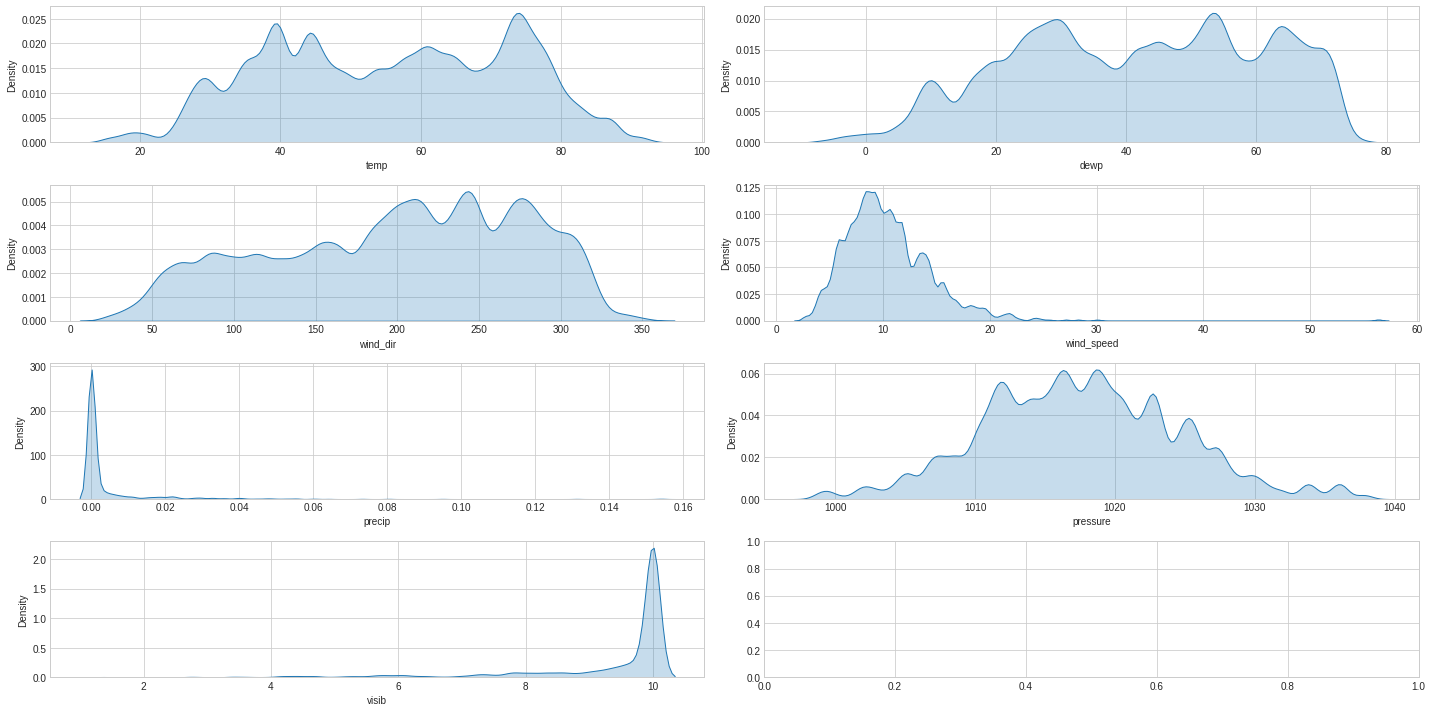

In [ ]:
num_cols=['temp','dewp','wind_dir','wind_speed','precip','pressure','visib']
fig,ax_row = plt.subplots(4,2,figsize=(20,10))
ax=[ax for ax_r in ax_row for ax in ax_r]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=df_flight_weather, x=c, ax=ax[i], fill=True)
plt.tight_layout()

#### Checking Outliers

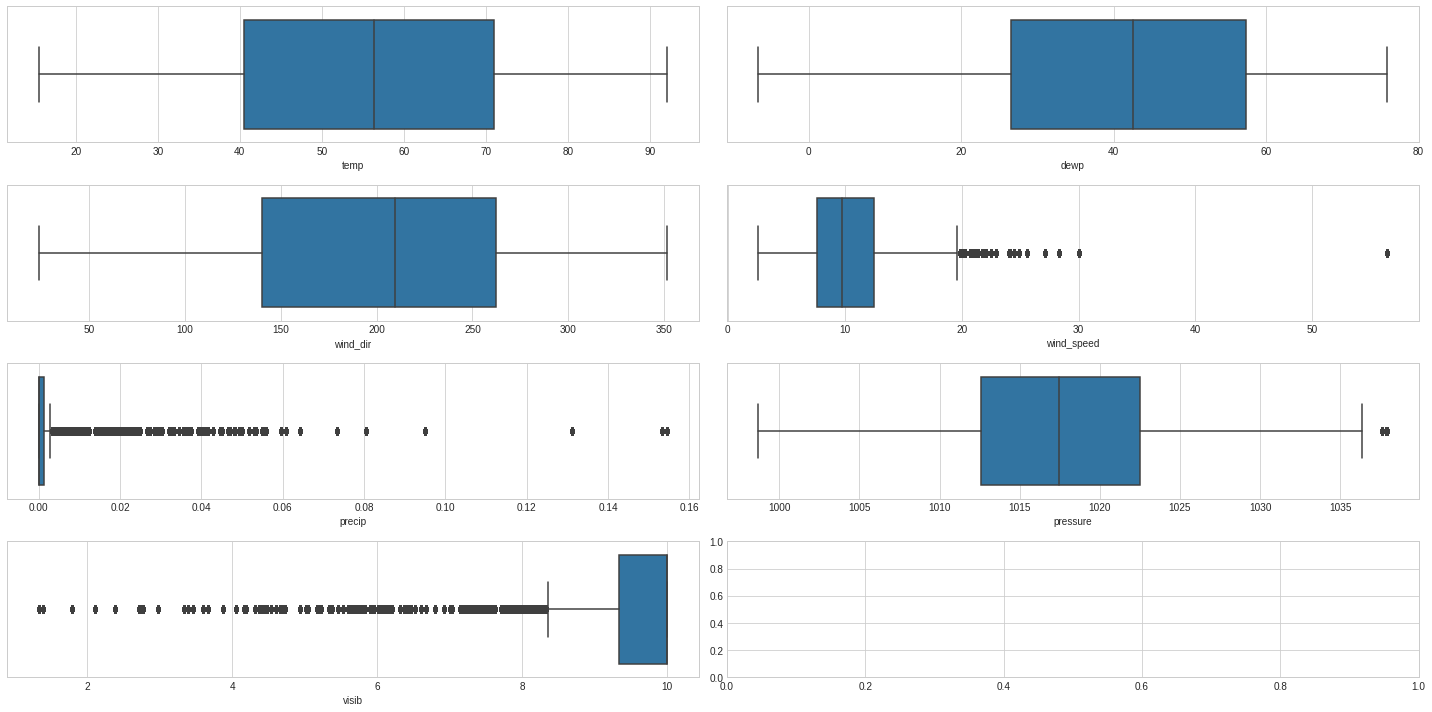

In [ ]:
num_cols=['temp','dewp','wind_dir','wind_speed','precip','pressure','visib']
fig,ax_row = plt.subplots(4,2,figsize=(20,10))
ax=[ax for ax_r in ax_row for ax in ax_r]
for i, c in enumerate(num_cols):
  plot = sns.boxplot(data=df_flight_weather, x=c, ax=ax[i])
plt.tight_layout()

**May be Due to this extreme weather condition flight gets delayed**

In [ ]:
def Count_Outlier(i):
  print("\n",i)
  q25,q75=np.percentile(df_flight_weather[i],25),np.percentile(df_flight_weather[i],75)
  iqr=q75-q25
  # print(f'q25:{q25}, iqr:{iqr},q75:{q75}')
  # we want to remove extreme outliers
  cut_off=iqr*1.5
  lower,upper= q25-cut_off,q75+cut_off
  # print(lower,upper)
  #outliers
  outliers=[]
  outliers=[x for x in df_flight_weather[i] if x<lower or x>upper]
  # print(outliers)
  # Count if outlier with delayed flight
  outliers_with_one=df_flight_weather.loc[((df_flight_weather[i]>upper)| 
                                           (df_flight_weather[i]>upper))&
                                           (df_flight_weather["dep_delay"]==1)]

  print(f"Identified outliers_with_one : {(outliers_with_one.shape[0])}")
  print(f"Identified Outliers : {len(outliers)}")
  # outliers=[x for x in df_flight_weather.visib if x<lower or x>upper]
  if len(outliers)==0:
    outliers=[1]
  print(f"Percentage of delayed flight due to outliers : {(outliers_with_one.shape[0]/70774)*100}")
  

In [ ]:
df_flight_weather.loc[(df_flight_weather["dep_delay"]==1)].shape

(70288, 19)

In [ ]:
for i in weather_col:
  Count_Outlier(i)


 temp
Identified outliers_with_one : 0
Identified Outliers : 0
Percentage of delayed flight due to outliers : 0.0

 dewp
Identified outliers_with_one : 0
Identified Outliers : 0
Percentage of delayed flight due to outliers : 0.0

 humid
Identified outliers_with_one : 0
Identified Outliers : 0
Percentage of delayed flight due to outliers : 0.0

 wind_dir
Identified outliers_with_one : 0
Identified Outliers : 0
Percentage of delayed flight due to outliers : 0.0

 wind_speed
Identified outliers_with_one : 1906
Identified Outliers : 7726
Percentage of delayed flight due to outliers : 2.6930793794331254

 precip
Identified outliers_with_one : 21455
Identified Outliers : 63465
Percentage of delayed flight due to outliers : 30.314804871845592

 pressure
Identified outliers_with_one : 88
Identified Outliers : 854
Percentage of delayed flight due to outliers : 0.12433944668946223

 visib
Identified outliers_with_one : 0
Identified Outliers : 52571
Percentage of delayed flight due to outliers :

  **Outliers can be very informative..**
  **So, I will not replace the outliers**

    So, I try to use algorithms which are less sensitive towards the outliers.

Many machine learning models, like linear & logistic regression, are easily impacted by the outliers in the training data. Models like AdaBoost increase the weights of misclassified points on every iteration and therefore might put high weights on these outliers as they tend to be often misclassified. This can become an issue if that outlier is an error of some type, or if we want our model to generalize well and not care for extreme values.

To overcome this issue, **we can either change the model or metric, or we can make some changes in the data** and use the same models.

**Model-Based Methods**

Use a different model: Instead of linear models, we can use tree-based methods like **Random Forests and Gradient Boosting techniques,** which are less impacted by outliers. This answer clearly explains why tree based methods are robust to outliers.

Metrics: Use MAE instead of RMSE as a loss function. We can also use truncated loss:

https://qr.ae/pNMZGn

One big reason is that they do a slice on the data, and then after that slice, it doesn't matter how big of a value you have. If you had five data points, and one of their features looked like  {1,2,3,4,1000000} , you might choose a split point at x = 2.5. At that point, 3,4, and a million all go into the same bucket, and their values are treated the same way. You could replace one million with something orders of magnitude bigger and it wouldn't matter, or you could change its value to 5 and it wouldn't matter. This restricts how much influence the outlying point can have. Contrast with linear regression, where the bigger that point gets, the more influence it will have on the entire model.

I don't know if this is a common terminology, but the tree based methods are kind of like  L0  flavored, which is the most robust you can get.

## Analysis of delayed_flight w.r.t. nyc_Planes
* Is manufacturing year impact on delayed flight?
* Is particular type of engine impact on delayed flight?
* Is particular manyfacturer impact on delayed flight?
* Is particular model impact on delayed flight?
* Is number of engine impact in delayed flight?
* Is number of seats impact on delayed flight?
* Is particular type of engine impact on delayed flight?

In [ ]:
df_flights=pd.read_csv("/content/drive/My Drive/ML/Datasets/Nyc_Airline/nyc_flights.csv",
                       usecols=['month', 'day', 'dep_delay','carrier', 'flight','tailnum',
                                'origin', 'dest', 'air_time', 'distance'])
df_planes=pd.read_csv("/content/drive/My Drive/ML/Datasets/Nyc_Airline/nyc_planes.csv")

In [ ]:
df_flight_planes=pd.merge(df_flights,df_planes,on="tailnum",how="left")
df_flight_planes.dep_delay=np.where(df_flight_planes.dep_delay>15.0,1,0)

In [ ]:
df_flight_planes.head()

,month,day,dep_delay,carrier,flight,tailnum,origin,dest,air_time,distance,year,type,manufacturer,model,engines,seats,speed,engine
0,1,1,0,UA,1545,N14228,EWR,IAH,227.0,1400,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,1,1,0,UA,1714,N24211,LGA,IAH,227.0,1416,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,1,1,0,AA,1141,N619AA,JFK,MIA,160.0,1089,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,1,1,0,B6,725,N804JB,JFK,BQN,183.0,1576,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,1,1,0,DL,461,N668DN,LGA,ATL,116.0,762,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan


### Checking Nan values

In [ ]:
df_flight_planes.isnull().sum()

month                0
day                  0
dep_delay         8255
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
year             57912
type             52606
manufacturer     52606
model            52606
engines          52606
seats            52606
speed           335813
engine           52606
dtype: int64

It's good to remove the nan in this case beacause its most of data is categorical and if we impute the data it would be mislead the prediction.

In [ ]:
df_flight_planes.drop("speed",axis=1,inplace=True)

In [ ]:
df_flight_planes.dropna(inplace=True)

### Is manufacturing year impact on delayed flight?

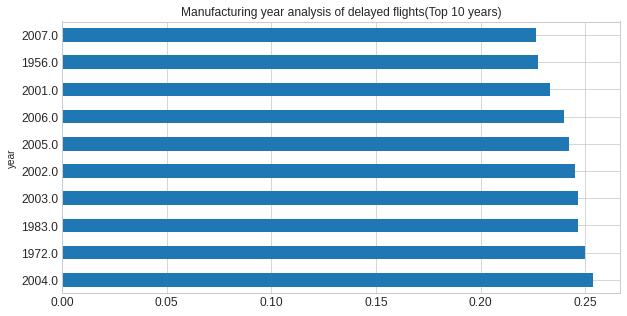

In [ ]:
plt.title("Manufacturing year analysis of delayed flights(Top 10 years)") 
df_flight_planes.groupby("year")["dep_delay"].mean().sort_values(ascending=False).head(10).plot(kind="barh",fontsize=12,figsize=(10,5))

**Alone not that much informative.** **bold text**

### Is particular type of engine impact on delayed flight? 

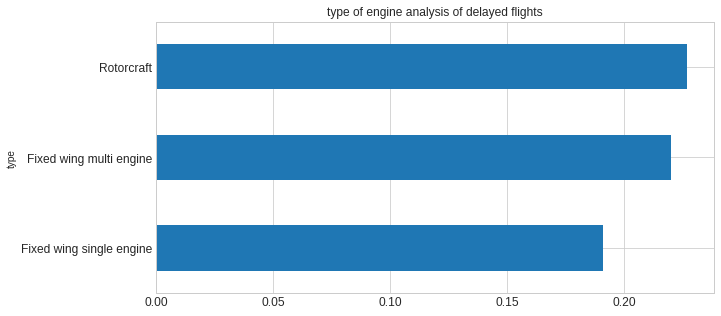

In [ ]:
plt.title("type of engine analysis of delayed flights") 
df_flight_planes.groupby("type")["dep_delay"].mean().sort_values().plot(kind="barh",fontsize=12,figsize=(10,5))

If Airplane has Fixed wing single engine then chances of delaying flight is less as compared to other types.

### Is particular manyfacturer impact on delayed flight?

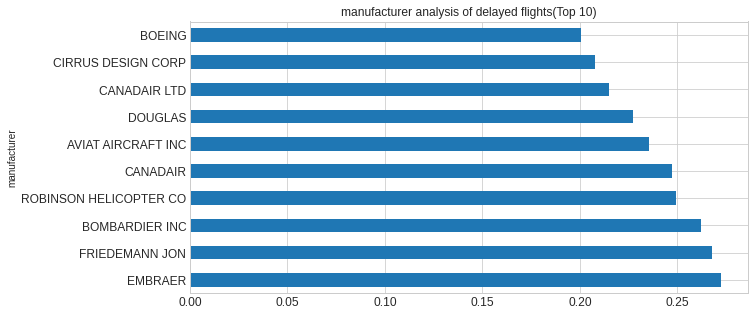

In [ ]:
plt.title("manufacturer analysis of delayed flights(Top 10)") 
df_flight_planes.groupby("manufacturer")["dep_delay"].mean().sort_values(ascending=False)[:10].plot(kind="barh",fontsize=12,figsize=(10,5))

**flights Manufacturered by EMBRAER, FRIEDEMANN JON and BOMBARDIER INC are delayed most of the time as compared to other.**

### Is particular model impact on delayed flight?

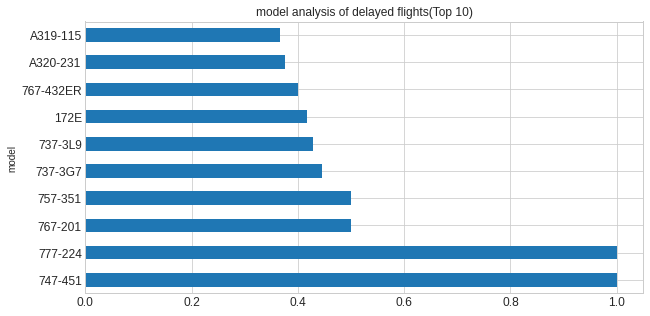

In [ ]:
plt.title("model analysis of delayed flights(Top 10)") 
df_flight_planes.groupby("model")["dep_delay"].mean().sort_values(
    ascending=False)[:10].plot(kind="barh",fontsize=12,figsize=(10,5))

**Flights with model 777-224 and 747-451 sure shot delayed.**

### Is number of engine impact in delayed flight? 

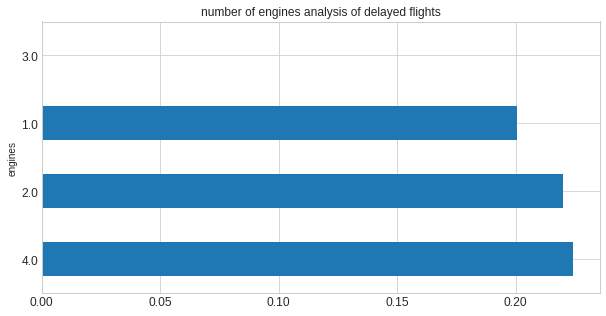

In [ ]:
plt.title("number of engines analysis of delayed flights") 
df_flight_planes.groupby("engines")["dep_delay"].mean().sort_values(
    ascending=False).plot(kind="barh",fontsize=12,figsize=(10,5))

**Flight with 2 or 4 number of engines are mostly delayed.**

### Is number of seats impact on delayed flight?

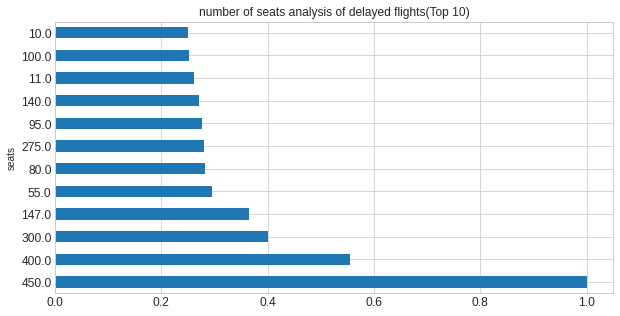

In [ ]:
plt.title("number of seats analysis of delayed flights(Top 10)") 
df_flight_planes.groupby("seats")["dep_delay"].mean().sort_values(
    ascending=False)[:10].plot(kind="barh",fontsize=12,figsize=(10,5))

**The max flight carry 450 passengers as time. The flights which carry max passengers(450) are mostly delayed.**

### Is particular type of engine impact on delayed flight?

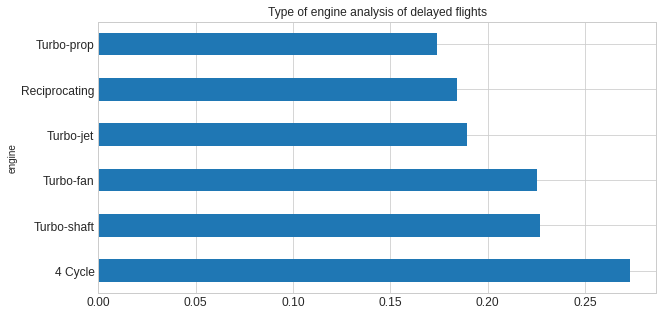

In [ ]:
plt.title("Type of engine analysis of delayed flights") 
df_flight_planes.groupby("engine")["dep_delay"].mean().sort_values(
    ascending=False).plot(kind="barh",fontsize=12,figsize=(10,5))

**Flight which contains 4 Cycle engine is delayed most as compared to other types.**

## Univariate Analysis - Pie

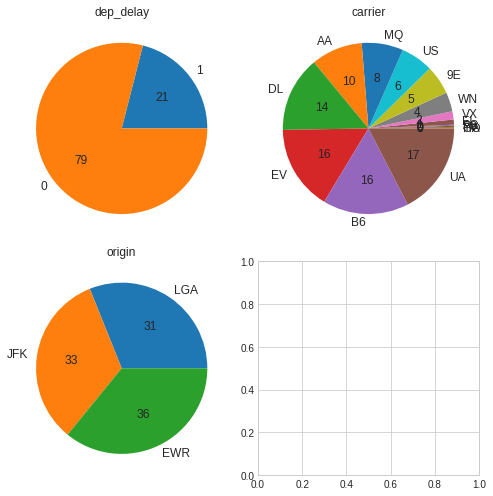

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(7,7))
axes=[ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(df_flights[cat_col]):
  _=df_flights[c].value_counts()[::-1].plot(kind="pie",ax=axes[i],title=c,autopct='%.0f',
                                                fontsize=12)
  _=axes[i].set_ylabel('')
_=plt.tight_layout()

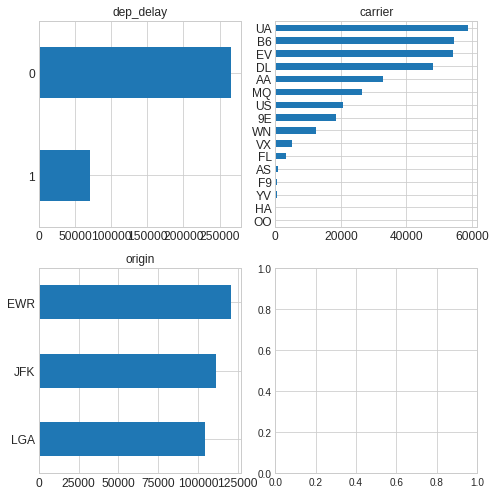

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(7,7))
axes=[ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(df_flights[cat_col]):
  _=df_flights[c].value_counts()[::-1].plot(kind="barh",ax=axes[i],title=c,fontsize=12)
  _=axes[i].set_ylabel('')
_=plt.tight_layout()